#Data Visualizations#

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import ttest_ind

In [48]:
#load dat aset from csv source file
data_set = pd.read_csv('DataSets/RawDataWithStudentsRemoved.csv')

print(data_set.head())

#review data set structure
data_set.dtypes
data_set.shape

#remove null term GPA from data set
data_set = data_set.dropna(subset = ['TermGPA'])

   FakeIdentifier  Age  Gender PrimaryMilitaryAffiliation AcademicCareer  \
0               1   18  Female    No Military Affiliation  Undergraduate   
1               2   72    Male    No Military Affiliation            Law   
2               3   26    Male    No Military Affiliation       Graduate   
3               4   47  Female                    Veteran       Graduate   
4               5   45    Male    No Military Affiliation  Undergraduate   

                          College  NumberofClassesEnrolled  TermGPA  \
0              College of Science                        4     3.75   
1   James E Rogers College of Law                        3     4.00   
2          College of Engineering                        2      NaN   
3       Coll of Ag Life & Env Sci                        2     4.00   
4  College of Information Science                        2     2.00   

   CumulativeGPA  UnitsPassedincludedinGPA  UnitsPassednotincludedinGPA  \
0          3.636                         

Let's visualize the Term GPA Distribution

In [27]:
#count of obervations by College

college_groups_df = data_set.groupby('College').size()

print(college_groups_df)

College
Col Arch Plan & Landscape Arch      864
Coll of Ag Life & Env Sci          3905
College of Applied Sci & Tech       134
College of Education               1101
College of Engineering             2084
College of Fine Arts                369
College of Humanities              2923
College of Information Science    10234
College of Medicine - Phoenix         2
College of Medicine - Tucson        273
College of Nursing                 2817
College of Science                 5154
College of Social & Behav Sci      7285
Colleges of Letters Arts & Sci      292
Eller College of Management       11128
Graduate College                    543
James C Wyant Coll Optical Sci      356
James E Rogers College of Law      1960
Undergraduate Education            2105
Zuckerman Coll Public Health       2040
dtype: int64


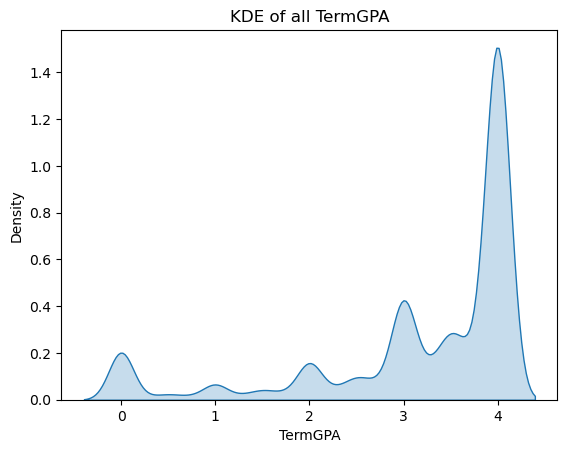

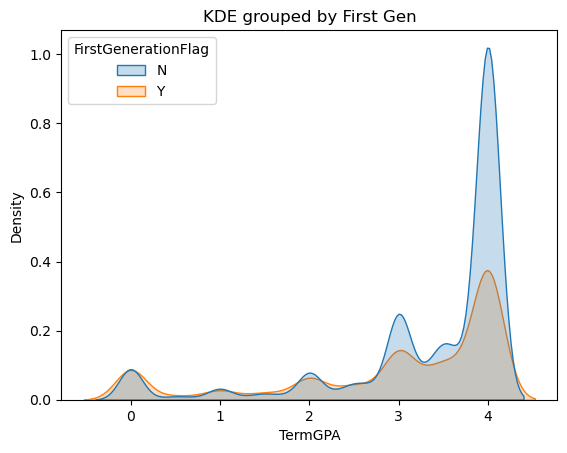

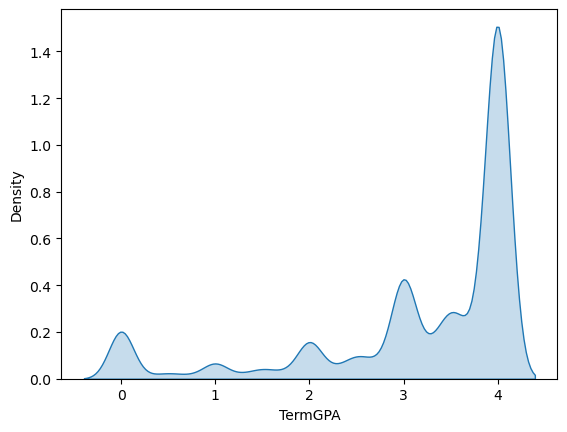

In [14]:
#make a Kernal Density Estimate PLot of all term GPA values
sns.kdeplot( data = data_set, x = 'TermGPA', fill = True)
plt.title('KDE of all TermGPA')
plt.show()


#by category:
sns.kdeplot( data = data_set, x = 'TermGPA', hue = 'FirstGenerationFlag', fill = True)
plt.title('KDE grouped by First Gen')
plt.show()


# make A histogram instead
sns.kdeplot( data = data_set, x = 'TermGPA', fill = True)
plt.show()

In [5]:
#Medians by Group

data_medians = data_set.groupby(['College', 'FirstGenerationFlag'])['TermGPA'].median().reset_index()

print(data_medians)

#Average by Group

data_means = data_set.groupby(['College', 'FirstGenerationFlag'])['TermGPA'].mean().reset_index()


                           College FirstGenerationFlag  TermGPA
0   Col Arch Plan & Landscape Arch                   N   4.0000
1   Col Arch Plan & Landscape Arch                   Y   3.6250
2        Coll of Ag Life & Env Sci                   N   3.6000
3        Coll of Ag Life & Env Sci                   Y   3.5000
4    College of Applied Sci & Tech                   N   4.0000
5    College of Applied Sci & Tech                   Y   3.3395
6             College of Education                   N   4.0000
7             College of Education                   Y   3.9500
8           College of Engineering                   N   4.0000
9           College of Engineering                   Y   3.5000
10            College of Fine Arts                   N   3.7270
11            College of Fine Arts                   Y   3.5000
12           College of Humanities                   N   3.4620
13           College of Humanities                   Y   3.5000
14  College of Information Science      

In [29]:
gpa_pivot = data_means.pivot(index='College', columns='FirstGenerationFlag', values='TermGPA')

#print(gpa_pivot)

gpa_mean_diff_by_college = gpa_pivot['N'] - gpa_pivot['Y']




print(gpa_mean_diff_by_college.sort_values(ascending = False))

College
College of Engineering            0.588556
Eller College of Management       0.586412
Zuckerman Coll Public Health      0.416424
College of Education              0.395769
College of Fine Arts              0.354513
College of Applied Sci & Tech     0.353581
Col Arch Plan & Landscape Arch    0.342375
College of Social & Behav Sci     0.334224
College of Medicine - Tucson      0.305340
College of Science                0.186402
College of Information Science    0.155623
Colleges of Letters Arts & Sci    0.155030
Coll of Ag Life & Env Sci         0.137401
Undergraduate Education           0.121670
James E Rogers College of Law     0.042876
College of Humanities             0.017528
Graduate College                 -0.000894
College of Nursing               -0.007494
James C Wyant Coll Optical Sci   -0.208166
College of Medicine - Phoenix          NaN
dtype: float64


After visual exploration of Term GPA values between our two focus groups, FirstGen and non-First Gen, we perform T-tests to se if the differences in Term GPA are statistically significant.

In [34]:
y_first_gen = data_set[data_set['FirstGenerationFlag'] == 'Y']['TermGPA']
n_first_gen = data_set[data_set['FirstGenerationFlag'] == 'N']['TermGPA']

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(y_first_gen, n_first_gen, equal_var=False)

print(f"FirstGen Y Mean GPA: {np.mean(y_first_gen):.3f}")
print(f"FirstGen N Mean GPA: {np.mean(n_first_gen):.3f}")


print(f"\nT-statistic: {t_statistic}")
print(f"P-value: {p_value}")

FirstGen Y Mean GPA: 2.961
FirstGen N Mean GPA: 3.340

T-statistic: -36.27059070487363
P-value: 1.6162248398096864e-283


In [ ]:
#allowed_values = ['College of Medicine - Phoenix', 'College of Fine Arts', 'Col Arch Plan & Landscape Arch', 'Zuckerman Coll Public Health']
#data_set = data_set[~data_set['College'].isin(allowed_values)]

college_ttest_results = {}

for d_value in data_set['College'].unique():
        subset_df = data_set[data_set['College'] == d_value]
        
        first_gen_col_y = subset_df[subset_df['FirstGenerationFlag'] == 'Y']['TermGPA']
        first_gen_col_n = subset_df[subset_df['FirstGenerationFlag'] == 'N']['TermGPA']
        
        
        # Perform independent samples t-test
        t_statistic, p_value = ttest_ind(first_gen_col_y, first_gen_col_n, equal_var=False) 
        
        
college_ttest_results[d_value] = {'t_statistic': t_statistic, 'p_value': p_value}

print(college_ttest_results)

{'College of Engineering': {'t_statistic': -9.231056262597033, 'p_value': 3.5781726529644965e-19}}


c:\Users\grann\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


We also calculate the T-values and p-values for Term GPA grouped by the different Colleges.
We do this grouping since some Coleges had larger differences in Term GPA between the two sets of students, and we want to explore if these differences are statistically significant.

In [69]:
ttest_college = 'College of Medicine - Phoenix'

y_first_gen_col = data_set[(data_set['FirstGenerationFlag'] == 'Y') & (data_set['College'] == ttest_college)]['TermGPA']
n_first_gen_col = data_set[(data_set['FirstGenerationFlag'] == 'N') & (data_set['College'] == ttest_college)]['TermGPA']

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(y_first_gen_col, n_first_gen_col, equal_var=False)

print(f"FirstGen Y Mean GPA: {np.mean(y_first_gen_col):.3f}")
print(f"FirstGen N Mean GPA: {np.mean(n_first_gen_col):.3f}")


print(f"\nT-statistic: {t_statistic}")
print(f"P-value: {p_value}")

FirstGen Y Mean GPA: nan
FirstGen N Mean GPA: 4.000

T-statistic: nan
P-value: nan


In [70]:
print(len(y_first_gen_col))
print(len(n_first_gen_col))
print((len(y_first_gen_col))+len(n_first_gen_col))

0
2
2


C:\Users\grann\AppData\Local\Temp\ipykernel_32996\321606025.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


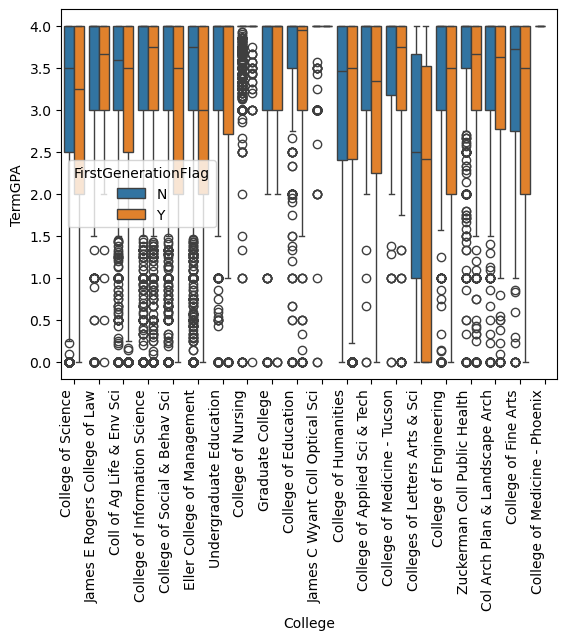

In [3]:
#plot the medians

ax = sns.boxplot(data = data_set, x = 'College', y = 'TermGPA', hue = 'FirstGenerationFlag')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right') 
#plt.figure(figsize = (14,8 ))
plt.show()


C:\Users\grann\AppData\Local\Temp\ipykernel_32996\319795148.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')


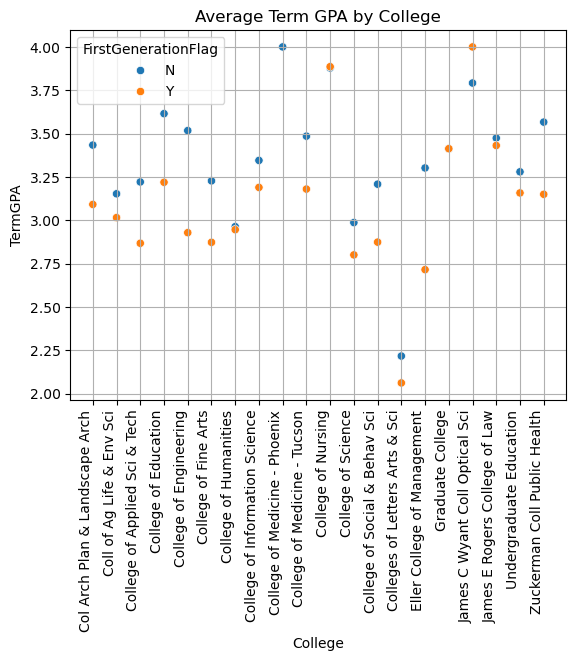

C:\Users\grann\AppData\Local\Temp\ipykernel_32996\319795148.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')


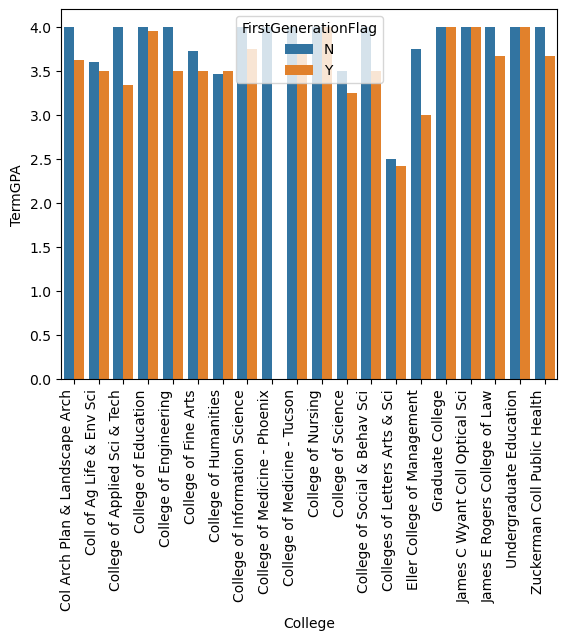

In [6]:
#Medians
axis = sns.scatterplot(data = data_means, x = 'College', y = 'TermGPA',  hue = 'FirstGenerationFlag')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right') 
plt.grid()
plt.title('Average Term GPA by College')
plt.show()

axis = sns.barplot(data = data_medians, x = 'College', y = 'TermGPA',  hue = 'FirstGenerationFlag')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right') 

plt.show()




In [ ]:
axis = snsplot(data = data_set, y = 'TermGPA',  hue = 'FirstGenerationFlag')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right') 
plt.show()

c:\Users\grann\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


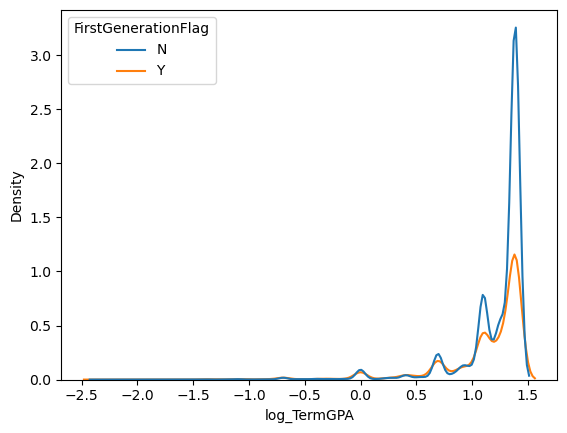

In [21]:
data_set['log_TermGPA'] = np.log(data_set['TermGPA'])

axis = sns.kdeplot(data = data_set, x = 'log_TermGPA',  hue = 'FirstGenerationFlag')
#axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right') 
plt.show()

In [1]:
#kmeans
from sklearn.cluster import KMeans

In [5]:
#encode features for kmeans
columns_to_encode = ['FirstGenerationFlag']
x_encoded = pd.get_dummies(data_set,
                                  columns=columns_to_encode,
                                    drop_first=True,
                                      dtype = int)

In [6]:
x = x_encoded[['TermGPA', 'FirstGenerationFlag_Y']].values

In [7]:
kmeans = KMeans(n_clusters=4, random_state=698, n_init='auto') # Example with 2 clusters
kmeans.fit(x)

KMeans(n_clusters=4, random_state=698)

In [8]:
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_ 

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')
plt.title('K-means Clustering (2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Plotting Differences in Term GPA by College

posx and posy should be finite values
posx and posy should be finite values


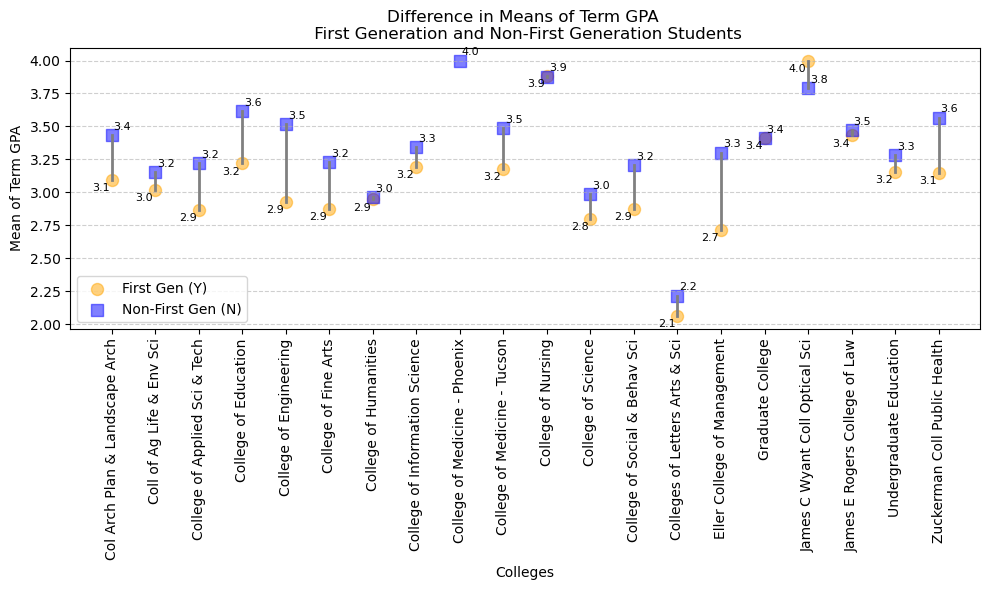

In [ ]:
#Grouped data frame of Mean term GPA by College for FG Y and N in alphabetical order
means_df = data_set.groupby(['College', 'FirstGenerationFlag'])['TermGPA'].mean().unstack().sort_values(by = 'College') 


#column_means = means_df.mean().sort_values() 

# 2. Reorder the columns of means_df using the sorted index of the column_means Series
#means_df_sorted = means_df.reindex(columns=column_means.index)

# 3. Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for Y and N groups
colors = {'Y': 'orange', 'N': 'blue'}
markers = {'Y': 'o', 'N': 's'}

# Plot the points and vertical lines for each group
for group in means_df.index:
    y_val = means_df.loc[group, 'Y']
    n_val = means_df.loc[group, 'N']
    x_pos = means_df.index.get_loc(group) # Get the numerical x position

    # Plot points for Y and N
    ax.scatter(x_pos, y_val, color=colors['Y'], marker=markers['Y'], s=75, label='First Gen (Y)' if group == 'College of Education' else "", alpha = 0.5)
    ax.scatter(x_pos, n_val, color=colors['N'], marker=markers['N'], s=75, label='Non-First Gen (N)' if group == 'College of Education' else "", alpha = 0.5)

    # Draw the vertical line between the points
    ax.plot([x_pos, x_pos], [y_val, n_val], color='gray', linestyle='-', linewidth=2)

    # Add value labels for each point
    #jitter the text positions
    ax.text((x_pos - 0.25), y_val-0.1, f'{y_val:.1f}', ha='center', va='bottom', fontsize=8, color= 'black')
    ax.text((x_pos + 0.25), n_val + 0.1, f'{n_val:.1f}', ha='center', va='top', fontsize=8, color='black')

# 4. Customize the plot
ax.set_xticks(range(len(means_df_sorted.index)))
ax.set_xticklabels(means_df_sorted.index)
ax.set_xlabel('Colleges')
ax.set_ylabel('Mean of Term GPA')
ax.set_title('Difference in Means of Term GPA \n First Generation and Non-First Generation Students')
ax.legend()
#title='Group Y/N'
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

C:\Users\grann\AppData\Local\Temp\ipykernel_32996\378947340.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([i, i], [y_means[i], n_means[i]], color='gray', linestyle='-', linewidth=1.5, zorder=1)


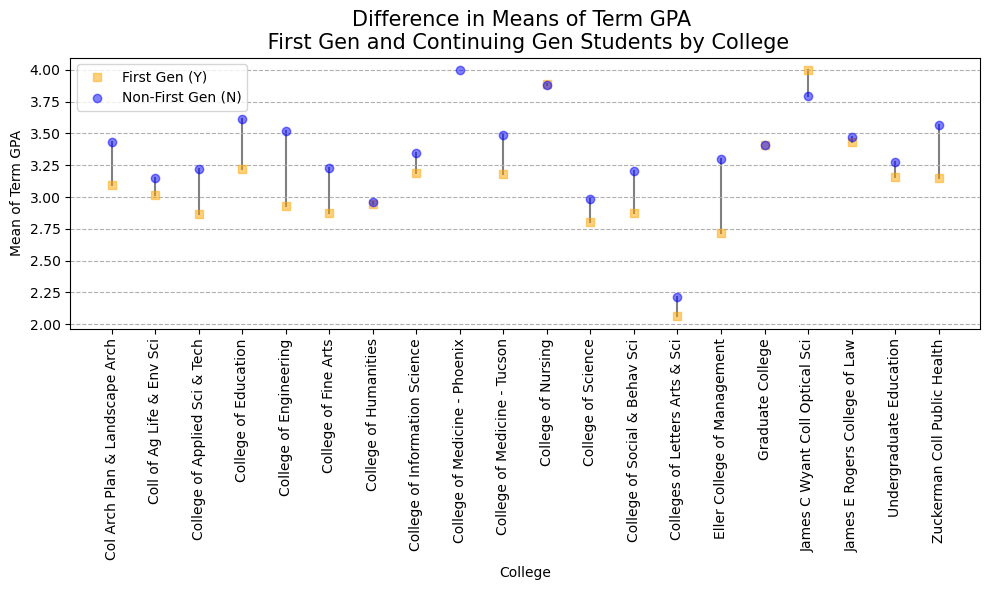

In [34]:
#means of termGPA by FG status across colleges

means_termgpa_fg = data_set.groupby(['College', 'FirstGenerationFlag'])['TermGPA'].mean().unstack()

# 3. Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

colleges = means_termgpa_fg.index
y_means = means_termgpa_fg['Y']
n_means = means_termgpa_fg['N']

# Plot means for Y and N as points
ax.scatter(colleges, y_means, color ='orange', label='First Gen (Y)', zorder=2, alpha = 0.5, marker = 's')
ax.scatter(colleges, n_means, color='blue', label='Non-First Gen (N)', zorder=2, alpha = 0.5, marker = 'o')

# Add vertical bars (lines) connecting the means
for i, col in enumerate(colleges):
    ax.plot([i, i], [y_means[i], n_means[i]], color='gray', linestyle='-', linewidth=1.5, zorder=1)
    # The [i, i] creates the x-coordinates for the vertical line at each category index

#for i, group in enumerate(colleges):
  #  y_y = means_termgpa_fg.loc[group, 'Y']
 #   y_n = means_termgpa_fg.loc[group, 'N']
    

    # Annotate Y and N values near the points
 #   ax.text(x_positions[i] - 0.1, y_y, f'{y_y:.1f}', color='blue', ha='right', va='center', fontsize=9)
 #   ax.text(x_positions[i] - 0.1, y_n, f'{y_n:.1f}', color='red', ha='right', va='center', fontsize=9)

# 4. Customize the plot
ax.set_xlabel('College')
ax.set_ylabel('Mean of Term GPA')
ax.set_title('Difference in Means of Term GPA \n First Gen and Continuing Gen Students by College', size = 15)
ax.set_xticks(range(len(colleges))) # Ensure x-axis uses category names as labels
plt.xticks(rotation=90) 
ax.set_xticklabels(colleges)
ax.legend()
ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()